In [1]:
# 1. Input Layer - CNN(Convolutional Neural Network) / Dense Layer / Convuled Layer
#     1. ReLU layer
#     2. Poling Layer
#     3. Upsampling
    
#         1. batcNormalization
#         2. Dropout Layer

# 2. Hidden Layer - NN(neural networks)
# 3. Output Layer - FCNN(Fully connected neural networks)

In [2]:
# 1. Tensorflow
# 2. Pytroch
# 3. MaxNet

# 1. Numpy
# 2. Pandas
# 3. Pillow
# 4. OpenCV
# 5. Scikit Learn

# 1. Plotly
# 2. matplotlib
# 3. seaborn

# 1. D3.js

# 1. NLTK

<h4><code>Importing Library<code></h4>
    
```python
    
for i in range(10):
    print(i)
print("This is For Loop")
```

In [3]:
# import tensorflow.compat.v1 as tf

#This section for model
import tensorflow as tf
#This section is algebric analysis
import numpy as np
import seaborn as sns
import pandas as pd
#This section for visulization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# help(warnings.filterwarnings)

In [5]:
# value = dict({"product_price1" : 10,
#         "product_price2" : 100})

In [6]:
# 1. Random: import random as rnd
# 2. Numpy: import numpy.random as npr
# 3. Tensorflow: import tensorflow.random

In [7]:
class NeuralNetwork:
    def __init__(self,layers):
        self.layers=layers
        self.L=len(layers)
        
        self.number_feature = layers[0]
        self.number_class = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dw = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
        for i in range(1,self.L):
            
            self.W[i] = tf.Variable(tf.random.normal(shape = (self.layers[i],self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape = (self.layers[i],1)))

In [8]:
# 1. dtype="float32"
# 2. dtype=np.float32
# 3. dtype=tf.float32
# 4. dtype=torch.float32

In [9]:
# Forward Propagation

class NeuralNetwork(NeuralNetwork):
    def forwardPass(self,A):
        A = tf.convert_to_tensor(A,dtype=float32)
        
        for i in range(1,self.L):
            Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            
            if i!=self.L-1:
                A =tf.nn.relu(Z)
            else:
                A = Z
        return A

In [10]:
#We will use this section for computing loss and Upgrading the previous parameters
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self,A,Y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y,A))
    
    def upgrade_parameters(self,lr):
        for j in range(1,self.L):
            self.W[j].assing_sub(lr*self.dw[j])
            self.b[j].assing_sub(lr*self.db[j])

In [11]:
# 0 index --> cats
# 1 index --> dogs

np.argmax([0.12,0.08])

0

In [12]:
class NeuralNetwork(NeuralNetwork):
    def predict(self,x):
        A = self.forwardPass(x)
        return tf.argmax(tf.nn.softmax(A),axis=1)
    
    def info(self):
        num_param = 0
        for i in range(1,self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        
        print('Number of feature: {}'.format(self.number_feature))
        print("Total Number of Class is: {}".format(self.number_class))
        
        print("Hidden Layer Information is: ")
        for j in range(1,self.L-1):
            print("layer: {}, Units: {}".format(i,self.layers[j]))
        
        print("Total Number of parameters : {}".format(num_params))

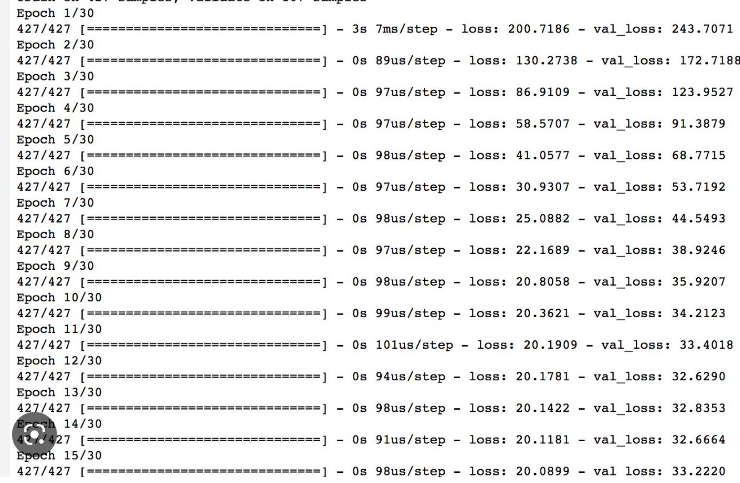

In [13]:
# importing Image class from PIL package
from PIL import Image

# creating a object
im = Image.open(r"./epochs.png")
im

In [14]:
# Training Start

class NeuralNetwork(NeuralNetwork):
    def train(sel,x_train,x_test,y_train,y_test,epochs,step_per_epochs,batch_size,lr):
        history = {"val_loss":[],
                   'train_loss':[],
                   'val_acc':[]
                  }